# 1. 加载数据

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',None)
data_df = pd.read_csv('../data/mtk.parse.csv')
print("data shape : ", data_df.shape)
data_df.head()

('data shape : ', (25962995, 37))


,JobId,ArrayIdx,submitTime,userId,userGroup,queue,app,project,command,cwd,resReq,slots,sla,subhost,infile,outfile,errfile,inFileSpool,cmdSpool,btime,termtime,jobname,preexec,maxslots,logshell,rsvId,lproject,postexec,jgroup,jobDesc,outdir,subcwd,options,runtime,cputime,starttime,maxmem
0,9378259,0,1502993780,1670012,1,1,1,1,1,1,1,12,1,1,1,1,1,1,1,0,0,1,1,12,1,1,1,1,1,1,1,1,369426439,7588,42827,1502993805,22876160
1,9416321,0,1503001346,1670627,1,2,2,2,2,2,2,1,1,2,1,1,1,1,1,0,0,1,1,1,1,1,2,1,1,2,1,2,503644167,29,9,1503001364,8192
2,9280905,0,1502979490,5609545,1,3,3,3,3,3,3,1,2,3,2,2,1,1,1,0,0,2,1,1,1,1,3,1,2,3,1,3,33882143,99,82,1503001294,283648
3,9413432,0,1503000627,1659501,1,4,4,4,4,4,4,1,1,4,1,1,1,1,1,0,0,1,1,1,1,1,4,1,1,4,1,4,33882119,750,733,1503000643,628736
4,9411992,0,1503000277,1659501,1,4,4,4,4,5,4,1,1,4,1,1,1,1,1,0,0,1,1,1,1,1,4,1,1,4,1,5,33882119,1101,1087,1503000292,714752


In [82]:
#reorder the data according to the submitTime
index = np.argsort(data_df.submitTime.values)
subsample_index = index[::20]
subsample_data = data_df.loc[subsample_index]

In [84]:
split_ratio = 0.8
total_num_examples = subsample_data.shape[0]
train_data_df = subsample_data.iloc[:int(split_ratio*total_num_examples)]
test_data_df = subsample_data.iloc[int(split_ratio*total_num_examples):]
train_data_df.to_csv('../data/mtk.parse.subsample.train.csv', index=False)
test_data_df.to_csv('../data/mtk.parse.subsample.test.csv', index=False)

1. UserGroup 仅有一个值 1

   2 . queue变量分析

In [10]:
from collections import Counter
queue = data_df.queue.values
queue_c =  Counter(queue)
for q in queue_c:
    print("Queue {:5d}: {:5d}".format(q, queue_c[q]))

Queue     1: 490687
Queue     2: 1986182
Queue     3: 4409385
Queue     4: 4995297
Queue     5: 557915
Queue     6: 10311
Queue     7: 4274711
Queue     8: 306846
Queue     9: 440927
Queue    10: 143073
Queue    11: 32456
Queue    12:  4116
Queue    13: 789035
Queue    14:   411
Queue    15: 15364
Queue    16:   879
Queue    17: 25445
Queue    18:  2019
Queue    19:  2079
Queue    20: 82200
Queue    21: 13909
Queue    22: 12499
Queue    23:  2358
Queue    24:   750
Queue    25: 3683702
Queue    26: 701834
Queue    27: 11928
Queue    28: 81310
Queue    29:  9845
Queue    30:   727
Queue    31: 1326778
Queue    32:  8125
Queue    33: 158091
Queue    34: 292940
Queue    35:  3821
Queue    36:  7924
Queue    37: 45480
Queue    38: 11715
Queue    39:  2937
Queue    40:  1258
Queue    41: 15867
Queue    42:  1069
Queue    43:  3712
Queue    44:   577
Queue    45:   185
Queue    46:  1245
Queue    47:  2602
Queue    48: 797825
Queue    49:  1698
Queue    50:  1192
Queue    51: 10173
Queue    

In [13]:
sum = 0
psum = 0
for q in queue_c:
    if queue_c[q] > 500000:
        psum += queue_c[q]
        print(q, queue_c[q])
    sum += queue_c[q]
print(sum, psum)

(2, 1986182)
(3, 4409385)
(4, 4995297)
(5, 557915)
(7, 4274711)
(13, 789035)
(25, 3683702)
(26, 701834)
(31, 1326778)
(48, 797825)
(25962995, 23522664)


   3 . slots变量分析

In [14]:
from collections import Counter
slots = data_df.slots.values
slots_c =  Counter(slots)
for q in slots_c:
    print("slots {:5d}: {:5d}".format(q, slots_c[q]))

slots    32:  1185
slots     1: 23841347
slots     2: 681776
slots     3:   260
slots     4: 679641
slots     6:   685
slots     7:     4
slots     8:  8729
slots    12: 743277
slots    16:  6091


4 .  subhost变量分析

In [ ]:
from collections import Counter
subhost = data_df.subhost.values
subhost_c =  Counter(subhost)
for q in subhost_c:
    print("subhost {:5d}: {:5d}".format(q, subhost_c[q]))

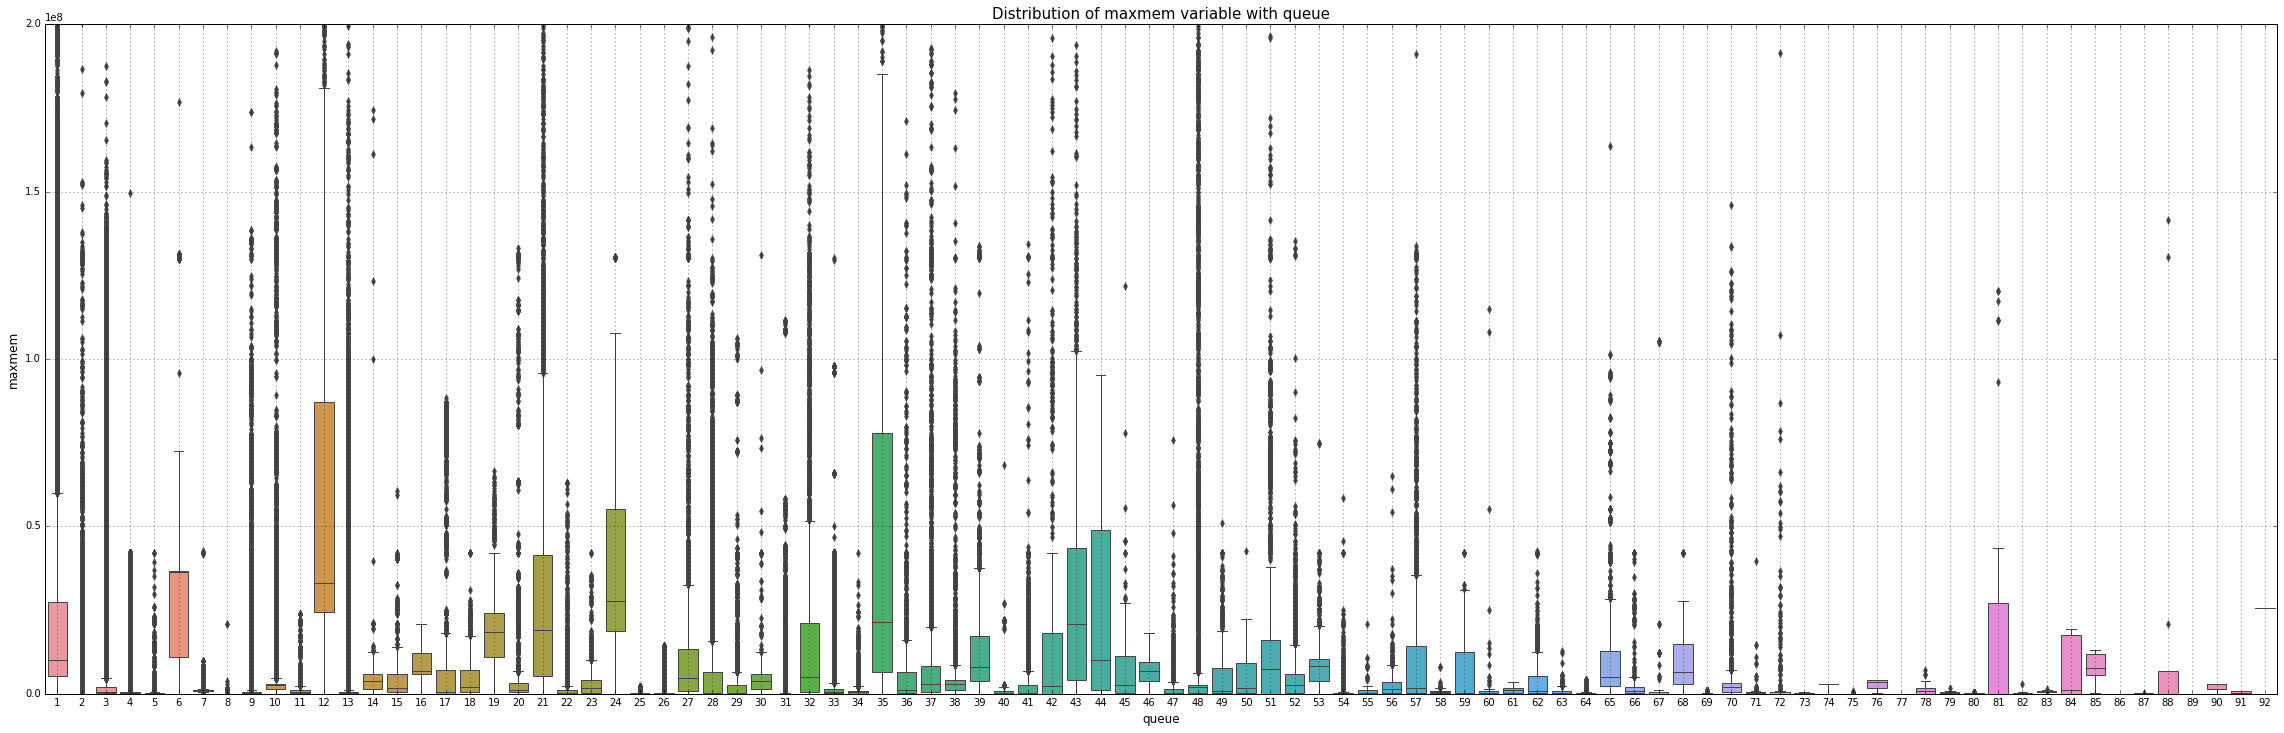

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

var_name = "queue"
col_order = np.sort(data_df[var_name].unique()).tolist()
plt.figure(figsize=(40,12))
sns.boxplot(x=var_name, y='maxmem', data=data_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.grid()
plt.ylim([0,2.0e8])
plt.ylabel('maxmem', fontsize=12)
plt.title("Distribution of maxmem variable with "+var_name, fontsize=15)
plt.show()

# 2. Data Exploration

- ## 检查数据的特征数目和类别

In [2]:
dtype_df = data_df.dtypes.reset_index()
dtype_df.columns = ["Varqueueiable Name", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Variable Name
0,int64,37


- ## Min, Max, Mean, Std-Dev, etc.

In [19]:
numerical_variable_names = dtype_df.loc[:]['Variable Name']
agg_df = data_df[numerical_variable_names].agg(['min','max','mean','std'])
agg_df.sort_values(by='std', axis=1)

,app,slots,queue,cpufactor,userGroup,project,userId,resReq,runtime,cputime,submitTime,ArrayIdx,cwd,command,JobId,maxmem
min,1.000000,1.000000,1.000000,870.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.476890e+09,0.000000,1.000000,1.000000,4.386324e+07,0.000000e+00
max,6.000000,20.000000,8.000000,890.000000,58.000000,59.000000,211.000000,513.000000,10370.000000,19760.000000,1.476901e+09,24364.000000,31985.000000,40795.000000,4.392092e+07,1.240058e+08
mean,1.004170,1.030637,2.575767,870.655556,11.746858,11.748191,59.111522,140.387975,199.020574,188.900907,1.476894e+09,2395.158871,8082.237936,13901.148968,4.388364e+07,5.419072e+05
std,0.091877,0.305252,0.621977,3.561097,8.841696,8.848097,47.384575,112.158624,662.609985,689.093148,2.907381e+03,4760.956889,8005.026751,11802.208397,1.528165e+04,1.881823e+06


- ## 数据分布图

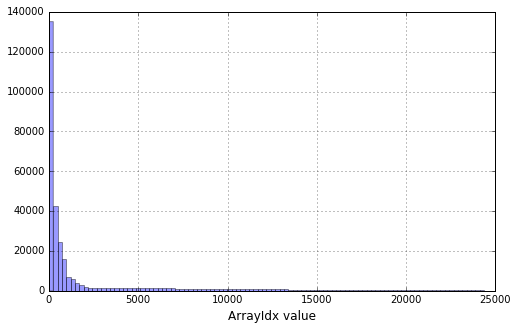

In [30]:
plt.figure(figsize=(8,5))
sns.distplot(data_df.ArrayIdx.values, bins=100, kde=False)
plt.grid()
plt.xlabel('ArrayIdx value', fontsize=12)
plt.show()

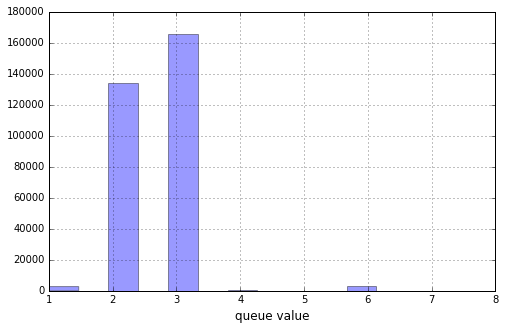

In [7]:
plt.figure(figsize=(8,5))
sns.distplot(data_df.queue.values, bins=15, kde=False)
plt.grid()
plt.xlabel('queue value', fontsize=12)
plt.show()

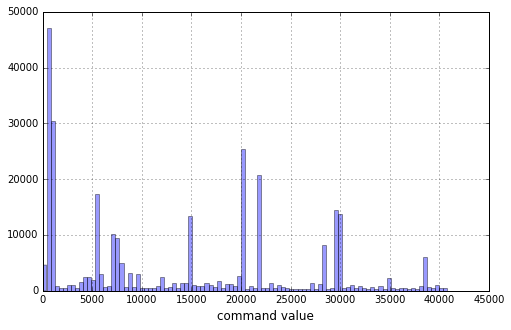

In [34]:
plt.figure(figsize=(8,5))
sns.distplot(data_df.command.values, bins=100, kde=False)
plt.grid()
plt.xlabel('command value', fontsize=12)
plt.show()

- ## 检查特征与目标值的相关性

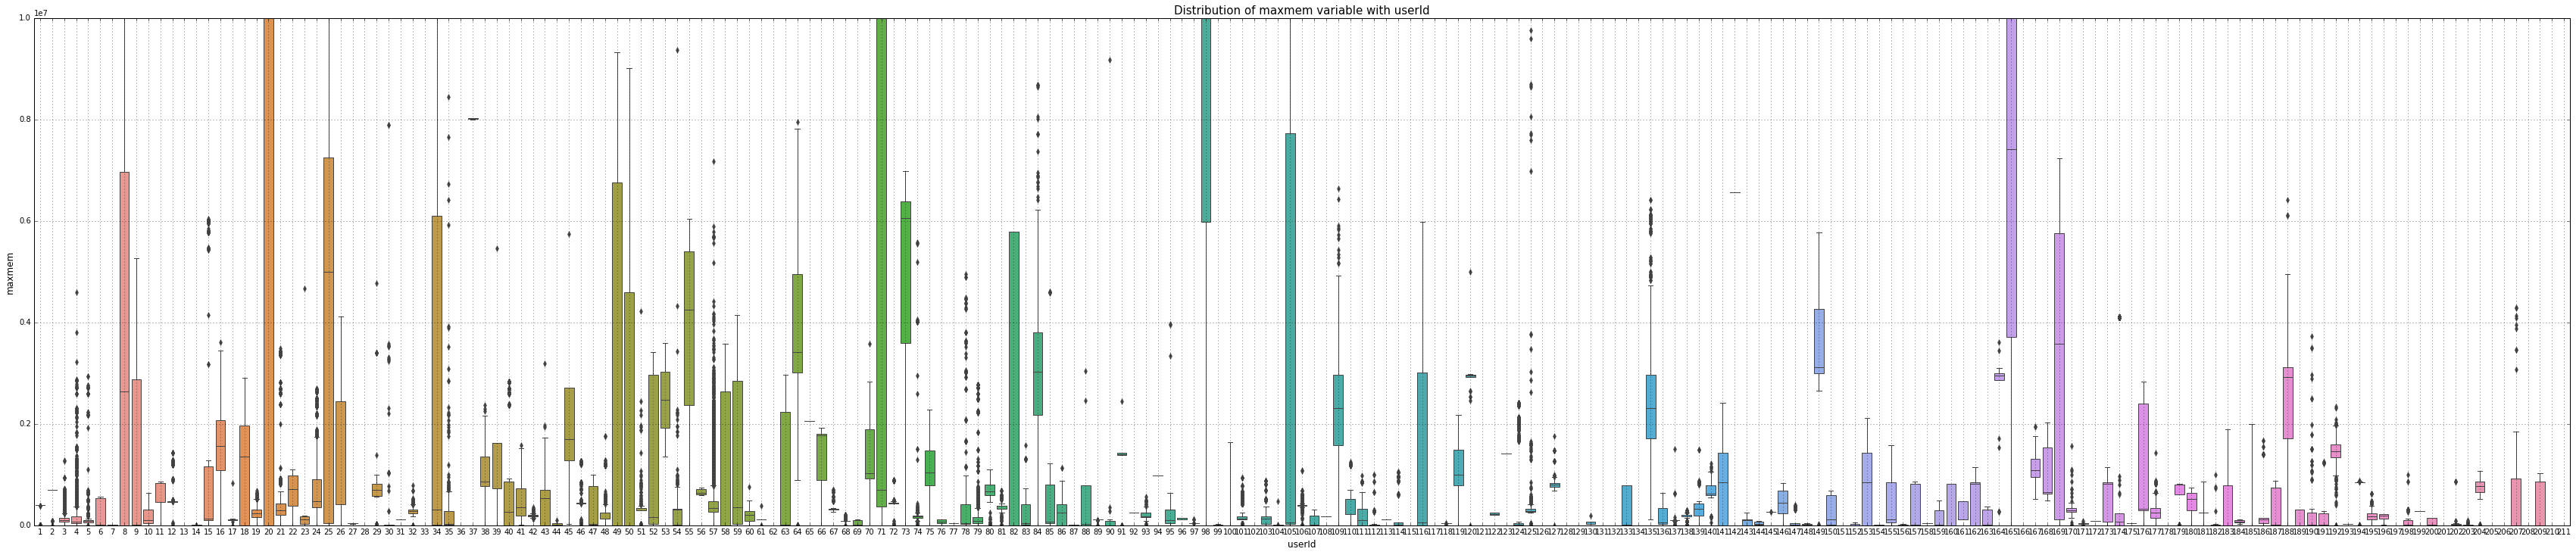

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

var_name = "runtime"
col_order = np.sort(data_df[var_name].unique()).tolist()
plt.figure(figsize=(60,12))
sns.boxplot(x=var_name, y='maxmem', data=data_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.grid()
plt.ylim([0,2.0e8])
plt.ylabel('maxmem', fontsize=12)
plt.title("Distribution of maxmem variable with "+var_name, fontsize=15)
plt.show()

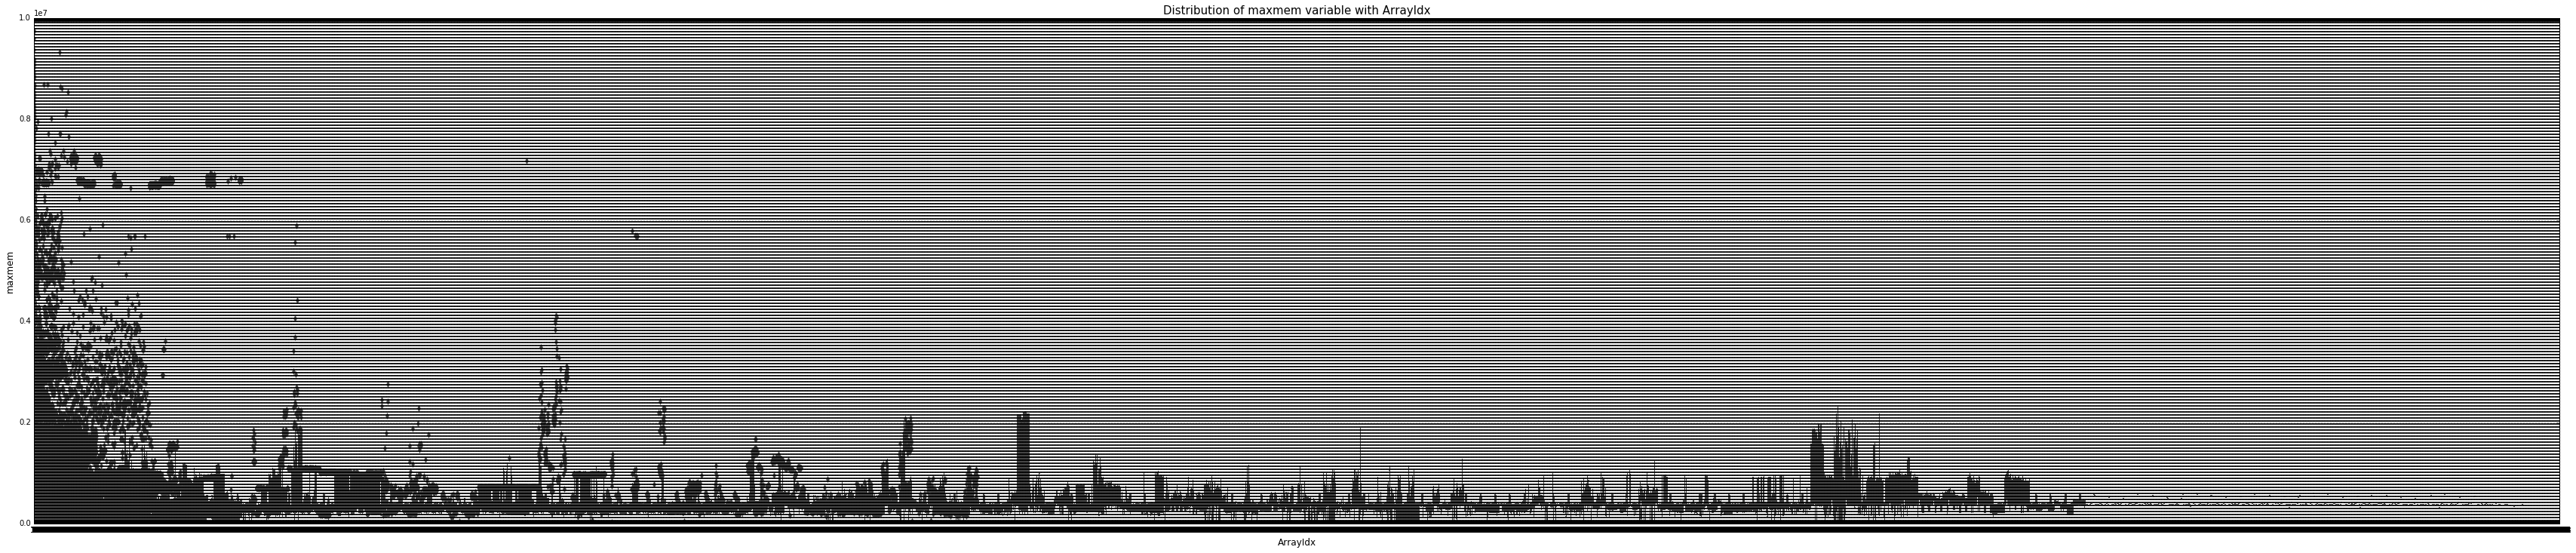

In [27]:
var_name = "ArrayIdx"
col_order = np.sort(data_df[var_name].unique()).tolist()
plt.figure(figsize=(60,12))
sns.boxplot(x=var_name, y='maxmem', data=data_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.grid()
plt.ylim([0,1.0e7])
plt.ylabel('maxmem', fontsize=12)
plt.title("Distribution of maxmem variable with "+var_name, fontsize=15)
plt.show()

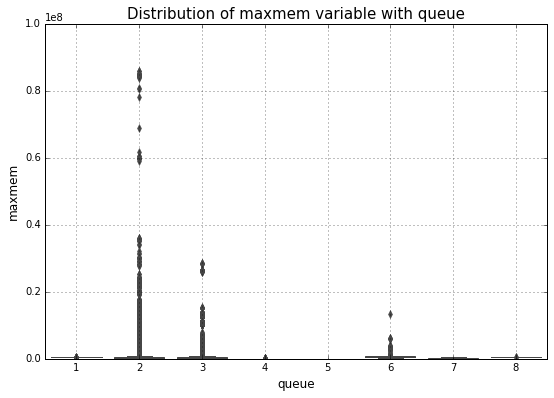

In [47]:
var_name = "queue"
col_order = np.sort(data_df[var_name].unique()).tolist()
plt.figure(figsize=(9,6))
sns.boxplot(x=var_name, y='maxmem', data=data_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.grid()
plt.ylim([0,1.0e8])
plt.ylabel('maxmem', fontsize=12)
plt.title("Distribution of maxmem variable with "+var_name, fontsize=15)
plt.show()

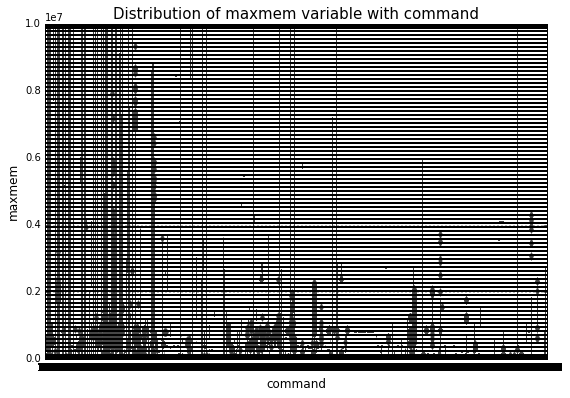

In [35]:
var_name = "command"
col_order = np.sort(data_df[var_name].unique()).tolist()
plt.figure(figsize=(9,6))
sns.boxplot(x=var_name, y='maxmem', data=data_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.grid()
plt.ylim([0,1.0e7])
plt.ylabel('maxmem', fontsize=12)
plt.title("Distribution of maxmem variable with "+var_name, fontsize=15)
plt.show()

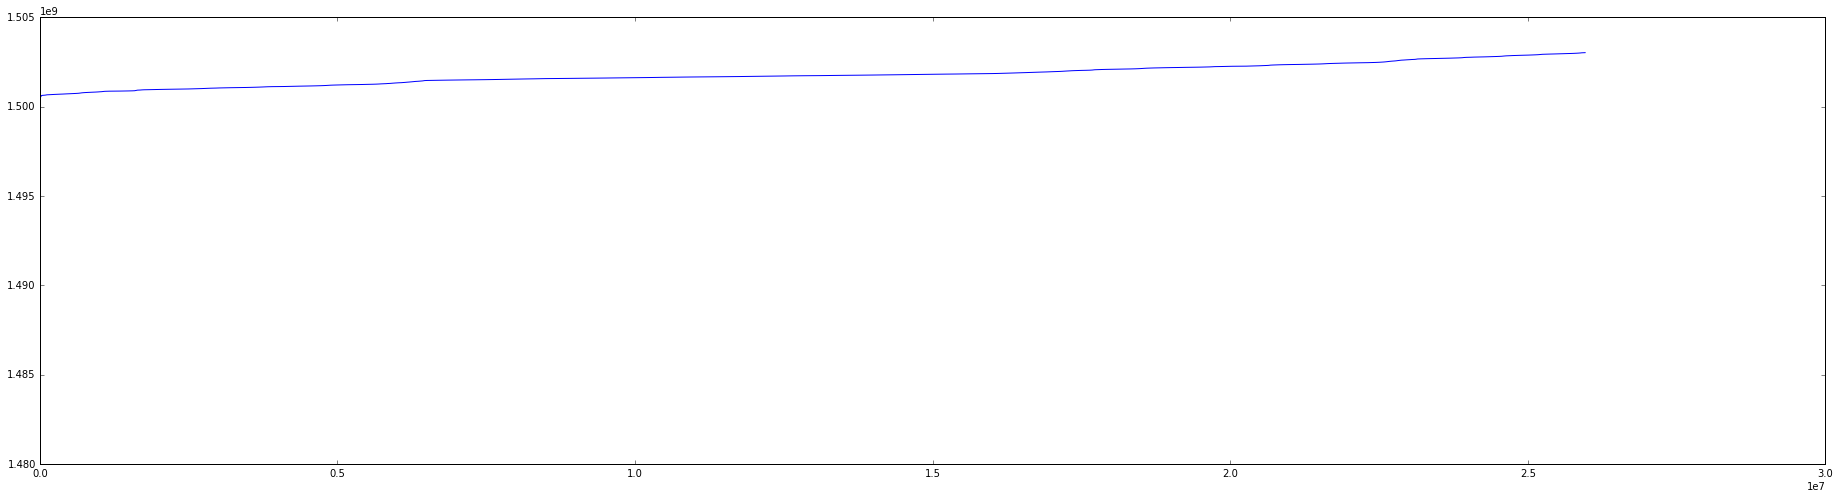

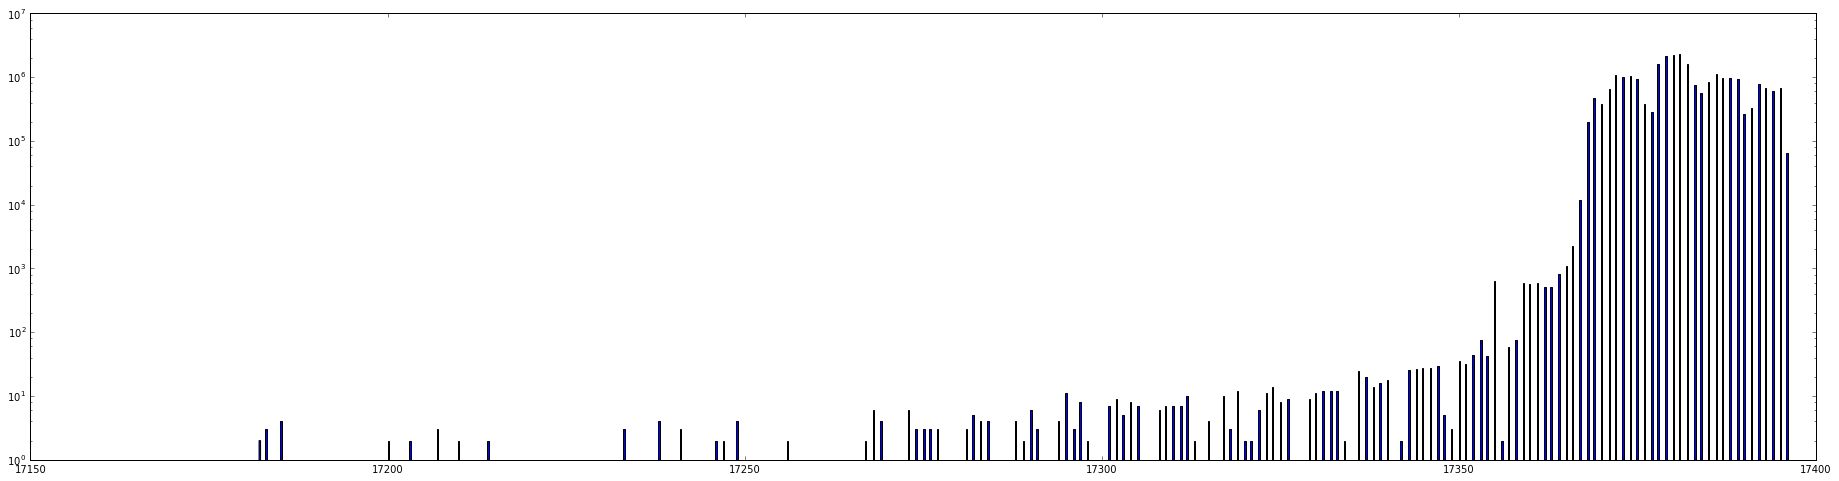

In [35]:
plt.figure(figsize=(32,8))
plt.plot(np.sort(data_df.submitTime.values))
plt.show()
plt.figure(figsize=(32,8))
bmin = np.min(data_df.submitTime.values)/(24*3600)
bmax = np.max(data_df.submitTime.values)/(24*3600)
plt.hist(data_df.submitTime.values/(24*3600), np.linspace(bmin, bmax, 1000))
plt.yscale('log')
plt.show()
# np.max(data_df.submitTime.values) - np.min(data_df.submitTime.values)

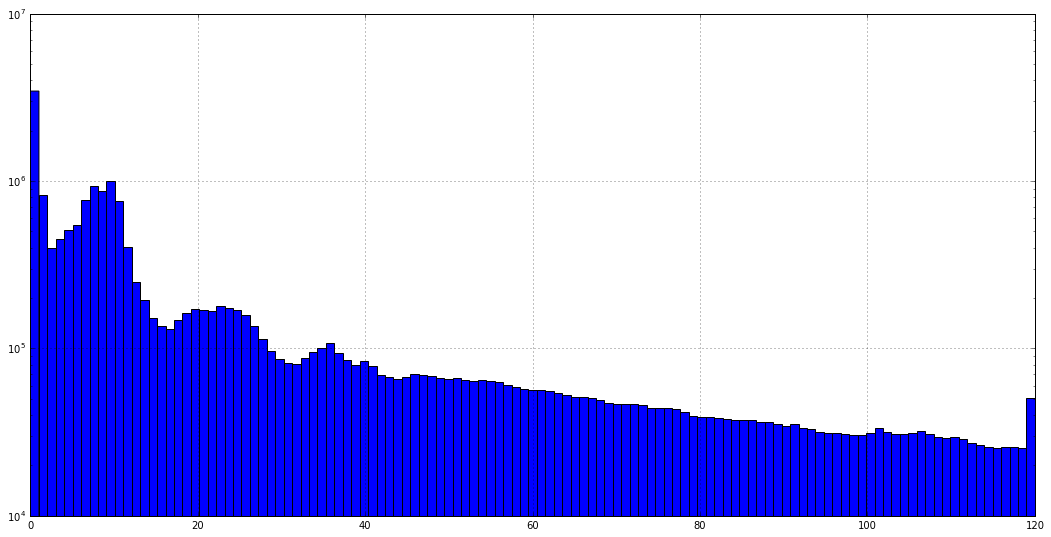

In [49]:
plt.figure(figsize=(18,9))
plt.hist(data_df.cputime, bins=np.linspace(0,120,120))
plt.yscale('log')
plt.grid()
plt.show()

In [61]:
x = data_df.maxmem.loc[data_df.cputime<120]

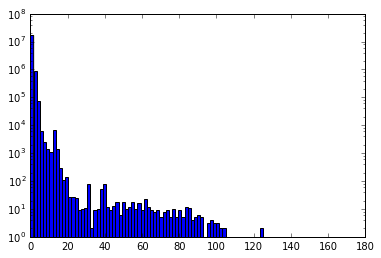

In [73]:
plt.hist(x/1024./1024., bins=100)
# plt.xscale('log')
plt.yscale('log')
plt.show()

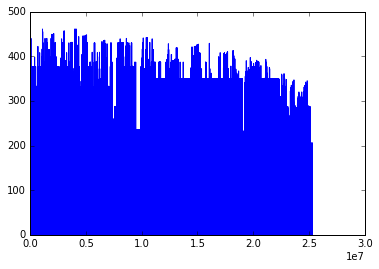

In [81]:
submitTime = data_df.submitTime.values
index = np.argsort(submitTime)
plt.plot(data_df.project.values[index])
plt.show()

In [80]:
x = np.array([1,2,1,212,1])
ix = np.argsort(x)
x[ix]

array([  1,   1,   1,   2, 212])

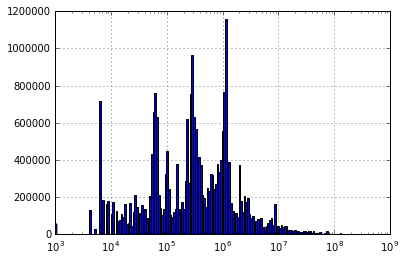

In [36]:
plt.hist(data_df['maxmem'].values, bins=np.logspace(3., 9, 200))
plt.xscale('log')
plt.grid()
# plt.xlim([0,0.00005])
plt.show()

# 3. 模型

## 3.1 Baseline模型 KNN

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pickle
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import ParameterGrid

def relative_correct_fraction(y_true, y_pred):
    index = (y_true != 0)
    y0 = y_true[index]
    y1 = y_pred[index]
    relative_error = (np.abs((y1-y0))/y0)
    return float(np.sum(relative_error<=1))/y0.shape[0]
    

hyper_params = {'n_neighbors': [1, 2, 3, 4, 5], 'do_normailization': [False, True],
               'do_scaling':[False, True]}
params_grid = ParameterGrid(hyper_params)



for param in params_grid:
    n_neighbors = param['n_neighbors']
    do_normailization = param['do_normailization']
    do_scaling = param['do_scaling']

    data_df = pd.read_csv('../data/arm.csv')
    total_num_examples, num_features = data_df.shape

    excluded_features = ['JobId', 'submitTime']
    training_features = ['ArrayIdx', 'userId', 'userGroup', 'queue', 'app',
                        'project', 'command', 'cwd', 'resReq', 'slots', 'cpufactor']
    tgt = 'maxmem'

    split_ratio = 0.8
    train_data_df = data_df.iloc[:int(split_ratio*total_num_examples)]
    test_data_df = data_df.iloc[int(split_ratio*total_num_examples):]

    #Step 1 加载数据
    train_X = train_data_df[training_features].values
    train_Y = train_data_df[tgt].values

    test_X = test_data_df[training_features].values
    test_Y = test_data_df[tgt].values

#     print('Data summary: Train ','(%d, %d)'%(train_X.shape[0], train_X.shape[1]), 
#           'Test ','(%d, %d)'%(test_X.shape[0], test_X.shape[1]))


    if do_normailization:
        trans = StandardScaler()
        train_X = trans.fit_transform(train_X)
        test_X = trans.transform(test_X)

    if do_scaling:
        trans = MinMaxScaler()
        train_X = trans.fit_transform(train_X)
        test_X = trans.transform(test_X)

    neigh = KNeighborsRegressor(n_neighbors=n_neighbors, n_jobs=100)
    neigh.fit(train_X, train_Y)
    y_pred = neigh.predict(test_X)
    print("Neighbor", n_neighbors,'(norm=%d, scale=%d)'%(do_normailization, do_scaling), 
          "RMSE= ", np.sqrt(mean_squared_error(y_true = test_Y, y_pred = y_pred)),
          "Relative correct fraction = ", relative_correct_fraction(y_true = test_Y, y_pred = y_pred))


## 3.2 Decision Tree

In [78]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

def myobj(preds, dtrain):
    a = 0.1
    b = 10
    labels = dtrain.get_label()
    grad = preds - labels
    index1 = grad>=0
    index2 = grad<0
    grad[index1] = a*grad[index1]
    grad[index2] = b*grad[index2]  
    hess = grad.copy()
    hess[index1] = a
    hess[index2] = b
    return grad, hess  

data_df = pd.read_csv('../data/mtk.parse.csv')
data_df = data_df.loc[data_df['maxmem'] > 0]
total_num_examples, num_features = data_df.shape

excluded_features = ['JobId', 'submitTime']
training_features = ['ArrayIdx', 'userId', 'userGroup', 'queue', 'app', 
                     'project', 'command', 'cwd', 'resReq', 'slots', 'sla', 'subhost', 'infile', 
                     'outfile', 'errfile', 'inFileSpool', 'cmdSpool', 'btime', 'termtime', 'jobname', 'preexec', 
                     'maxslots', 'logshell', 'rsvId', 'lproject', 'postexec', 'jgroup', 'jobDesc', 
                     'outdir', 'subcwd', 'options']
tgt = 'maxmem'

split_ratio = 0.8
train_data_df = data_df.iloc[:int(split_ratio*total_num_examples)]
test_data_df = data_df.iloc[int(split_ratio*total_num_examples):]

#Step 1 加载数据
train_X = train_data_df[training_features].values
train_Y = np.log(train_data_df[tgt].values+1.)

test_X = test_data_df[training_features].values
test_Y = np.log(test_data_df[tgt]+1.)

print('Data summary: Train ','(%d, %d)'%(train_X.shape[0], train_X.shape[1]), 
      'Test ','(%d, %d)'%(test_X.shape[0], test_X.shape[1]))

dtrain = xgb.DMatrix(train_X, train_Y,feature_names= training_features)
dval = xgb.DMatrix(test_X, test_Y,feature_names= training_features)

hyper_params = {'eta':[ 0.01],
               'max_depth':[3], 'subsample':[0.01]}

params_grid = ParameterGrid(hyper_params)

for param in params_grid:
    #Step 2 训练模型
    xgb_params = { 
        'eta': param['eta'],
        'max_depth': param['max_depth'],
        'subsample': param['subsample'],
        #  回归任务常使用 reg:linear
        #  分类任务常使用 binary:logistic／multi:softmax
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'base_score': np.median(train_Y),
        'silent': 0
    }
    # 保存boosting每个Iteration的eval result
    evals_result = {}
    num_boost_round = 20000
    model = xgb.train(xgb_params, dtrain, obj=myobj, verbose_eval= 1, num_boost_round=num_boost_round, evals = [(dtrain, "Train"), (dval, "Validation")], 
                      evals_result=evals_result)

    pickle.dump(evals_result, open('evals_result_xgb_eta_%f_maxdepth_%d_subsample_%f.pkl'%(xgb_params['eta'],
                                                                                          xgb_params['max_depth'],
                                                                                          xgb_params['subsample']),'w'))

    result = evals_result['Validation']['rmse']
    best_niters = np.argmin(result)
    y_pred = model.predict(dval, ntree_limit=best_niters)
    
    pickle.dump({'pred':y_pred, 'label':test_Y}, 'result')
    model.dump_model('model_eta_%f_maxdepth_%d_subsample_%f.bin'%(xgb_params['eta'],
                                                                  xgb_params['max_depth'],
                                                                  xgb_params['subsample'])
                     ,'featmap_eta_%f_maxdepth_%d_subsample_%f.bin'%(xgb_params['eta'],
                                                                  xgb_params['max_depth'],
                                                                  xgb_params['subsample']))


('Data summary: Train ', '(237091, 11)', 'Test ', '(59273, 11)')
({'subsample': 0.8, 'eta': 0.2, 'max_depth': 2}, 97224.070311999996, ' at #iter=', 584, 'relative correctness=', 0.9185970003205507)
({'subsample': 0.95, 'eta': 0.2, 'max_depth': 2}, 90942.609375, ' at #iter=', 569, 'relative correctness=', 0.9540600273311626)
({'subsample': 0.999999, 'eta': 0.2, 'max_depth': 2}, 87445.976561999996, ' at #iter=', 597, 'relative correctness=', 0.8992964756297134)
({'subsample': 0.8, 'eta': 0.2, 'max_depth': 3}, 97224.070311999996, ' at #iter=', 584, 'relative correctness=', 0.9185970003205507)
({'subsample': 0.95, 'eta': 0.2, 'max_depth': 3}, 90942.609375, ' at #iter=', 569, 'relative correctness=', 0.9540600273311626)
({'subsample': 0.999999, 'eta': 0.2, 'max_depth': 3}, 87445.976561999996, ' at #iter=', 597, 'relative correctness=', 0.8992964756297134)
({'subsample': 0.8, 'eta': 0.2, 'max_depth': 4}, 97224.070311999996, ' at #iter=', 584, 'relative correctness=', 0.9185970003205507)
({'s

In [80]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid

    
def relative_correct_fraction(y_true, y_pred):
    index = (y_true != 0)
    y0 = y_true[index]
    y1 = y_pred[index]
    relative_error = (np.abs((y1-y0))/y0)
    return float(np.sum(relative_error<=1))/y0.shape[0]


data_df = pd.read_csv('../data/arm.csv')
data_df = data_df.loc[data_df['maxmem'] > 0]
data_df['weights'] = 1.0e6/data_df['maxmem'].values/data_df['maxmem'].values
total_num_examples, num_features = data_df.shape

excluded_features = ['JobId', 'submitTime']
training_features = ['ArrayIdx', 'userId', 'userGroup', 'queue', 'app',
                    'project', 'command', 'cwd', 'resReq', 'slots', 'cpufactor']
tgt = 'maxmem'
w = 'weights'

split_ratio = 0.8
train_data_df = data_df.iloc[:int(split_ratio*total_num_examples)]
test_data_df = data_df.iloc[int(split_ratio*total_num_examples):]

#Step 1 加载数据
train_X = train_data_df[training_features]
train_Y = train_data_df[tgt]
train_weight = train_data_df[w].values

test_X = test_data_df[training_features]
test_Y = test_data_df[tgt]
test_weight = test_data_df[w].values

print('Data summary: Train ','(%d, %d)'%(train_X.shape[0], train_X.shape[1]), 
      'Test ','(%d, %d)'%(test_X.shape[0], test_X.shape[1]))

dtrain = xgb.DMatrix(train_X, train_Y,feature_names= training_features, weight=train_weight)
dval = xgb.DMatrix(test_X, test_Y,feature_names= training_features, weight=test_weight)

hyper_params = {'eta':[0.2, 0.1, 0.05, 0.01, 0.005],
               'max_depth':[2,3,4], 'subsample':[0.8,0.95, 0.999999]}

params_grid = ParameterGrid(hyper_params)

for param in params_grid:
    #Step 2 训练模型
    xgb_params = { 
        'eta': param['eta'],
        'max_depth': param['max_depth'],
        'subsample': param['subsample'],
        #  回归任务常使用 reg:linear
        #  分类任务常使用 binary:logistic／multi:softmax
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'base_score': np.mean(train_Y),
        'silent': 0
    }
    # 保存boosting每个Iteration的eval result
    evals_result = {}
    num_boost_round = 600
    model = xgb.train(xgb_params, dtrain, verbose_eval= False, num_boost_round=num_boost_round, evals = [(dtrain, "Train"), (dval, "Validation")], 
                          evals_result=evals_result)

    pickle.dump(evals_result, open('evals_result_xgb_eta_%f_maxdepth_%d_subsample_%f.pkl'%(xgb_params['eta'],
                                                                                          xgb_params['max_depth'],
                                                                                          xgb_params['subsample']),'w'))

    result = evals_result['Validation']['rmse']
    best_niters = np.argmin(result)
    y_pred = model.predict(dval, ntree_limit=best_niters)
    
    print(param, np.min(result), ' at #iter=', best_niters, 
          'relative correctness=',relative_correct_fraction(test_Y.values, y_pred))

('Data summary: Train ', '(237091, 11)', 'Test ', '(59273, 11)')
({'subsample': 0.8, 'eta': 0.2, 'max_depth': 2}, 9947.5380860000005, ' at #iter=', 198, 'relative correctness=', 0.8750695932380679)
({'subsample': 0.95, 'eta': 0.2, 'max_depth': 2}, 9832.9169920000004, ' at #iter=', 244, 'relative correctness=', 0.8532046631687278)
({'subsample': 0.999999, 'eta': 0.2, 'max_depth': 2}, 9804.9921880000002, ' at #iter=', 304, 'relative correctness=', 0.9421827813675704)
({'subsample': 0.8, 'eta': 0.2, 'max_depth': 3}, 10172.745117, ' at #iter=', 85, 'relative correctness=', 0.8554822600509507)
({'subsample': 0.95, 'eta': 0.2, 'max_depth': 3}, 10160.914062, ' at #iter=', 33, 'relative correctness=', 0.9824203262868423)
({'subsample': 0.999999, 'eta': 0.2, 'max_depth': 3}, 10132.013671999999, ' at #iter=', 166, 'relative correctness=', 0.9755875356401734)
({'subsample': 0.8, 'eta': 0.2, 'max_depth': 4}, 10151.155273, ' at #iter=', 38, 'relative correctness=', 0.9316046091812461)
({'subsample'

('Data summary: Train ', '(237091, 11)', 'Test ', '(59273, 11)')
({'subsample': 0.95, 'eta': 0.2, 'max_depth': 3}, 10160.914062, ' at #iter=', 33, 'relative correctness=', 0.9824203262868423)


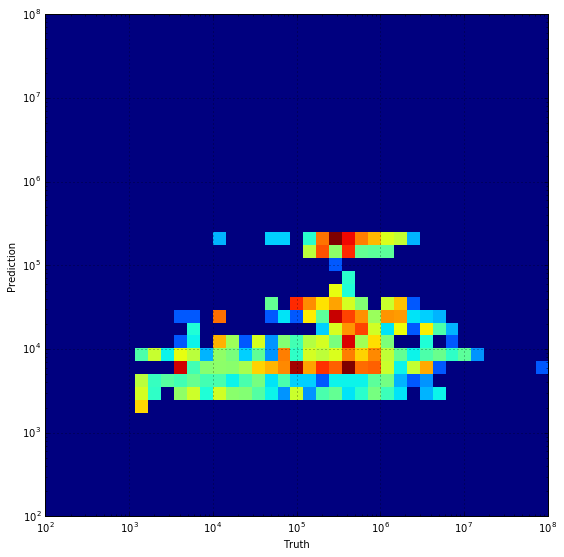

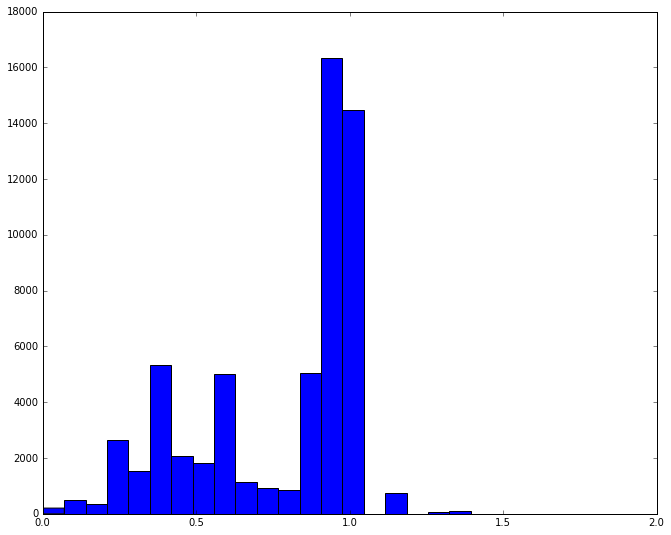

In [30]:
import numpy as np
import pandas as pd
import xgboost as xgb
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid
from matplotlib.colors import LogNorm

    
def relative_correct_fraction(y_true, y_pred):
    index = (y_true != 0)
    y0 = y_true[index]
    y1 = y_pred[index]
    relative_error = (np.abs((y1-y0))/y0)
    return float(np.sum(relative_error<=1))/y0.shape[0]


data_df = pd.read_csv('../data/arm.csv')
data_df = data_df.loc[data_df['maxmem'] > 0]
data_df['weights'] = 1.0e6/data_df['maxmem'].values/data_df['maxmem'].values
total_num_examples, num_features = data_df.shape

excluded_features = ['JobId', 'submitTime']
training_features = ['ArrayIdx', 'userId', 'userGroup', 'queue', 'app',
                    'project', 'command', 'cwd', 'resReq', 'slots', 'cpufactor']
tgt = 'maxmem'
w = 'weights'

split_ratio = 0.8
train_data_df = data_df.iloc[:int(split_ratio*total_num_examples)]
test_data_df = data_df.iloc[int(split_ratio*total_num_examples):]

#Step 1 加载数据
train_X = train_data_df[training_features]
train_Y = train_data_df[tgt]
train_weight = train_data_df[w].values

test_X = test_data_df[training_features]
test_Y = test_data_df[tgt]
test_weight = test_data_df[w].values

print('Data summary: Train ','(%d, %d)'%(train_X.shape[0], train_X.shape[1]), 
      'Test ','(%d, %d)'%(test_X.shape[0], test_X.shape[1]))

dtrain = xgb.DMatrix(train_X, train_Y,feature_names= training_features, weight=train_weight)
dval = xgb.DMatrix(test_X, test_Y,feature_names= training_features, weight=test_weight)

hyper_params = {'eta':[0.2],
               'max_depth':[3], 'subsample':[0.95]}

params_grid = ParameterGrid(hyper_params)

for param in params_grid:
    #Step 2 训练模型
    xgb_params = { 
        'eta': param['eta'],
        'max_depth': param['max_depth'],
        'subsample': param['subsample'],
        #  回归任务常使用 reg:linear
        #  分类任务常使用 binary:logistic／multi:softmax
        'objective': 'reg:linear',
        'eval_metric': 'rmse',
        'base_score': np.mean(train_Y),
        'silent': 0
    }
    # 保存boosting每个Iteration的eval result
    evals_result = {}
    num_boost_round = 100
    model = xgb.train(xgb_params, dtrain, verbose_eval= False, num_boost_round=num_boost_round, evals = [(dtrain, "Train"), (dval, "Validation")], 
                          evals_result=evals_result)

    
    result = evals_result['Validation']['rmse']
    best_niters = np.argmin(result)
    y_pred = model.predict(dval, ntree_limit=best_niters)
    print(param, np.min(result), ' at #iter=', best_niters, 
          'relative correctness=',relative_correct_fraction(test_Y.values, y_pred))
#     plt.figure()
#     x = 1.0e8*np.random.randn(100000)
#     y = 1.0e8*np.random.randn(100000) + 5
#     plt.hist2d(x, y, bins=np.logspace(2., 8, 10))
#     print(test_Y.values[:20], y_pred[:20])
    H, xedges, yedges = np.histogram2d(test_Y.values, y_pred, bins=np.logspace(2., 8, 40))
    H = np.log2(H.T+0.1) 
#     print(H)
    fig = plt.figure(figsize=(11, 9))
    plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
#     plt.hist2d(test_Y.values, y_pred, bins=np.logspace(2., 8, 3))
#     plt.colorbar()
#     plt.scatter(test_Y.values, y_pred)
    plt.xlabel('Truth')
    plt.ylabel('Prediction')
    plt.xscale('log')
    plt.yscale('log')
#     plt.xlim([1000, .2e6])
#     plt.ylim([1000, 1.0e6])
    plt.grid()
    plt.figure(figsize=(11,9))
    relative = np.abs(test_Y.values-y_pred)/test_Y.values
    plt.xlim([0, 2])
    plt.hist(relative, bins=200)
    plt.show()
    

In [1]:
import numpy as np
import pandas as pd

import pickle
import sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline

import xgboost as xgb
from sklearn.linear_model import LassoLarsCV, LassoCV
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor


## 3.3 Stacked Model

In [4]:
import numpy as np
import pandas as pd

import pickle
import sklearn
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA, FastICA, TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.base import BaseEstimator,TransformerMixin, ClassifierMixin
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline

import xgboost as xgb
from sklearn.linear_model import LassoLarsCV, LassoCV
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

def relative_correct_fraction(y_true, y_pred):
    index = (y_true != 0)
    y0 = y_true[index]
    y1 = y_pred[index]
    relative_error = (np.abs((y1-y0))/y0)
    return float(np.sum(relative_error<=1))/y0.shape[0]


class StackingEstimator(BaseEstimator, TransformerMixin):
    def __init__(self,  estimator, mix_data = False):
        self.estimator = estimator
        self.mix_data = mix_data

    def fit(self, X, y=None, **fit_params):
        self.estimator.fit(X, y, **fit_params)
        return self

    def transform(self, X):
        X = check_array(X)
        if self.mix_data:
            X_transformed = np.copy(X)
            # add class probabilities/decision_functions as a synthetic feature
            if hasattr(self.estimator, 'predict_proba'):
                X_transformed = np.hstack((self.estimator.predict_proba(X), X))
            elif 1(self.estimator, 'decision_function'):
                X_transformed = np.hstack((self.estimator.decision_function(X), X))
        else:
            if hasattr(self.estimator, 'predict_proba'):
                X_transformed = self.estimator.predict_proba(X)
            elif hasattr(self.estimator, 'decision_function'):
                X_transformed = self.estimator.decision_function(X)
        # add class prodiction as a synthetic feature
        X_transformed = np.hstack((np.reshape(self.estimator.predict(X), (-1, 1)), X_transformed))
        return X_transformed

data_df = pd.read_csv('../data/arm.csv')
data_df = data_df.loc[data_df['maxmem'] > 0]
data_df['weights'] = 1./data_df['maxmem'].values
total_num_examples, num_features = data_df.shape

excluded_features = ['JobId', 'submitTime']
training_features = ['ArrayIdx', 'userId', 'userGroup', 'queue', 'app',
                    'project', 'command', 'cwd', 'resReq', 'slots', 'cpufactor']
tgt = 'maxmem'
w = 'weights'

split_ratio = 0.8
train_data_df = data_df.iloc[:int(split_ratio*total_num_examples)]
test_data_df = data_df.iloc[int(split_ratio*total_num_examples):]

#Step 1 加载数据
train_X = train_data_df[training_features].values
train_Y = train_data_df[tgt].values
train_weight = train_data_df[w].values

test_X = test_data_df[training_features].values
test_Y = test_data_df[tgt].values
test_weight = test_data_df[w].values

print('Data summary: Train ','(%d, %d)'%(train_X.shape[0], train_X.shape[1]), 
      'Test ','(%d, %d)'%(test_X.shape[0], test_X.shape[1]))

pipline_steps = []

#1. preprocess
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
pipline_steps.append(('preprocess',min_max_scaler))

#2.0 random projection
random_projection = StackingEstimator(sklearn.random_projection.GaussianRandomProjection(), mix_data=True)
pipline_steps.append(('random_projection', random_projection))
#2.1 linear features
linear_features_list = []
svr_rbf = StackingEstimator(sklearn.svm.SVR(kernel='rbf'), mix_data = True)
linear_features_list.append(('svr_rbf', svr_rbf))
svr_poly = StackingEstimator(sklearn.svm.SVR(kernel='poly'))
linear_features_list.append(('svr_poly', svr_poly))
svr_linear = StackingEstimator(sklearn.svm.SVR(kernel='linear'))
linear_features_list.append(('svr_linear', svr_linear))

lasso_lars = StackingEstimator(LassoLarsCV())
linear_features_list.append(('lasso_lars', lasso_lars))
lasso = StackingEstimator(LassoCV())
linear_features_list.append(('lasso', lasso))

step2_features = FeatureUnion(transformer_list=linear_features_list)
pipline_steps.append(('step2_features', step2_features))

#3. decision tree
xgb_params = {
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'silent': 0,
    'n_estimators': 1000,
    'n_jobs':100
}
xgboost = xgb.XGBRegressor(**xgb_params)
pipline_steps.append(('xgb', xgboost))

pipline = Pipeline(steps=pipline_steps)



('Data summary: Train ', '(237091, 11)', 'Test ', '(59273, 11)')
['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_estimator_type', '_final_estimator', '_fit', '_get_param_names', '_get_params', '_inverse_transform', '_pairwise', '_replace_step', '_set_params', '_transform', '_validate_names', '_validate_steps', 'classes_', 'decision_function', 'fit', 'fit_predict', 'fit_transform', 'get_params', 'inverse_transform', 'named_steps', 'predict', 'predict_log_proba', 'predict_proba', 'score', 'set_params', 'steps', 'transform']


In [5]:
x = tf.placeholder(tf.float32, ())
tf.get_default_graph()

# y = ax + e, e~n(0,1)
def generate_data(nsamples, nfeatures):
    coeff = np.random.randn(nfeatures)
    xlim = [-10,10]
    noise_sigma = 1
    x = np.random.uniform(xlim[0], xlim[1], (nsamples, nfeatures))
    y = np.dot(x, coeff.reshape(-1,1)) + noise_sigma*np.random.randn(nsamples,1)
    return x,y.flatten()

def customized_loss(preds, dtrain):
    a = 0.1
    b = 10.
    labels = dtrain.get_label()
    grad =  preds - labels
    pos_index = grad >= 0
    neg_index = grad < 0
    grad[pos_index] *= a
    grad[neg_index] *= b

    hess = grad.copy()
    hess[pos_index] = a
    hess[neg_index] = b

    return grad, hess


nsamples = 1000
nfeatures = 10
data_x, data_y = generate_data(nsamples, nfeatures)
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2)

xgb_params = {
    'eta': 0.0045,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'base_score':  np.mean(train_y),
    'silent': 0
}

dtrain = xgb.DMatrix(train_x, train_y)
dtest = xgb.DMatrix(test_x, test_y)

model1 = xgb.train(xgb_params, dtrain, verbose_eval = 50, num_boost_round= 1000)
pred1 = model1.predict(dtest)

model2 = xgb.train(xgb_params, dtrain, obj=customized_loss,  verbose_eval = 50, num_boost_round= 1000)
pred2 = model2.predict(dtest)

plt.figure()
plt.plot([np.min(test_y), np.max(test_y)], [np.min(test_y), np.max(test_y)], linewidth=2)
plt.scatter(pred1, test_y, marker='+', s=10)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.grid()

plt.figure()
plt.plot([np.min(test_y), np.max(test_y)], [np.min(test_y), np.max(test_y)], linewidth=2)
plt.scatter(pred2, test_y, marker='+', s=10)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.grid()
plt.show()


{'preprocess': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'preprocess__copy': True,
 'preprocess__feature_range': (0, 1),
 'random_projection': StackingEstimator(estimator=GaussianRandomProjection(eps=0.1, n_components='auto', random_state=None),
          mix_data=True),
 'random_projection__estimator': GaussianRandomProjection(eps=0.1, n_components='auto', random_state=None),
 'random_projection__estimator__eps': 0.1,
 'random_projection__estimator__n_components': 'auto',
 'random_projection__estimator__random_state': None,
 'random_projection__mix_data': True,
 'step2_features': FeatureUnion(n_jobs=1,
        transformer_list=[('svr_rbf', StackingEstimator(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          mix_data=True)), ('svr_poly', StackingEstimator(estimator=SVR(C=1.0, cache_size=200, c...', random_state=None, selection='cyclic', tol=0.0001,
     verbose=Fal

# 4. Variable Importance

In [93]:
c = np.array([test_Y.values,y_pred])
c.transpose()

array([[ 187668.    ,    6981.0625],
       [  97168.    ,   39282.75  ],
       [ 254792.    ,   13608.9375],
       ..., 
       [   1664.    ,    8473.375 ],
       [   4252.    ,    6684.5625],
       [   4264.    ,    6684.5625]])

# 5. Raw Data

In [3]:
import os, sys
os.path.basename('/asdas/asdasd')

'asdasd'

In [73]:
import pandas as pd
import os,sys
import numpy as np
from collections import Counter

datafile = '/root/kaiwu/LSF/data/stm.raw.csv'
# data = pd.read_csv(datafile, delimiter = " ")

count = 0
all_cmds = {}
allcs = []
with open(datafile) as f:
    for line in f:
        utime = line.split('"')[0].split()[2]
        uid = line.split('"')[0].split()[3]
        maxmem = line.split('"')[-1].split()[-1]
        cmd = line.split('"')[9]
        full_cmd = cmd.split()
        cmd = full_cmd[0]
        cmd = os.path.basename(cmd)
        if len(full_cmd)>1:
            args = ''.join(full_cmd[1:])
        else:
            args = ''
        if cmd not in all_cmds:
            all_cmds[cmd] = []
        all_cmds[cmd].append(int(maxmem))
        allcs.append(cmd)
#         if cmd != 'eos_runLiberty.csh':
#             continue
#         resReq = line.split('"')[-2]
#         print(utime, uid, cmd,  maxmem)
#         print(line)
        count += 1
#         if count > 20:
#             break
c = Counter(allcs)
idx = [c[k] for k in c]
o_idx = np.argsort(idx)
keys = [k for k in c]


print("{:22s} |{:6s} |{:10s} |{:10s} |{:10s} |{:10s} |{:10s}".format("COMMAND", "Count", "Min", "Mean","Median",  "Max", "Std"))
for p in range(len(o_idx)-1, 0, -1):
    cmd = keys[o_idx[p]]
    index = np.array(all_cmds[cmd]) != 0
    val = np.array(all_cmds[cmd])[index]
    if val.shape[0] <= 0:
        continue
    min_ = np.min(val)
    mean_ = np.mean(val)
    max_ = np.max(val)
    std_ = np.std(val)
    median_ = np.median(val)
    print("{:22s} |{:6d} |{:10.1f} |{:10.1f} |{:10.1f} |{:10.1f} |{:10.1f}".format(cmd[:20],len(all_cmds[cmd]), min_, mean_,median_, max_, std_) )

COMMAND                |Count  |Min        |Mean       |Median     |Max        |Std       
tcsh                   | 61386 |    1724.0 |  158848.2 |  135988.0 |20850788.0 |  286659.6
dpl_remote_launcher.   | 60206 |    1676.0 |  554414.9 |  261276.0 |16375276.0 |  908527.2
eldo                   | 17327 |    1176.0 |  228512.2 |   48756.0 |12274180.0 |  705036.8
sh                     | 12913 |    1128.0 |  142924.8 |   98052.0 |14016868.0 |  165660.0
eval                   | 10084 |    1224.0 | 1554078.5 |  958338.0 |60962260.0 | 1489587.7
env                    |  3245 |   21492.0 |  700100.6 |  231016.0 |33454500.0 | 1625861.5
bench.mrun_cmd         |  2907 |  237556.0 |  363499.4 |  349736.0 |  491272.0 |   38666.2
gjob                   |  2783 |   10420.0 | 2125368.0 | 1080284.0 |65292516.0 | 4324510.7
runDoe                 |  2634 |    1768.0 |  263944.7 |  197632.0 | 1444556.0 |  253723.0
FI_lsf_dispatcher      |  2161 |   13004.0 |   70560.1 |   69288.0 |  104676.0 |    3655.3

simu_top_reset_gener   |     6 |   37476.0 |  422520.7 |  607078.0 |  609076.0 |  262356.6
simu_top_reset_gener   |     6 |   37480.0 |  422662.0 |  607616.0 |  609264.0 |  262455.4
simu_top_reset_gener   |     6 |   31524.0 |  326765.3 |  336976.0 |  609272.0 |  282036.7
export-src-newlib-ls   |     6 |   10956.0 |   11164.0 |   11144.0 |   11392.0 |     178.6
simu_top_reset_gener   |     6 |   37476.0 |  327988.0 |  337386.0 |  609220.0 |  281181.6
hudson_groups_JOB53_   |     6 |   83304.0 |   84741.3 |   83312.0 |   87608.0 |    2027.0
simu_top_reset_gener   |     6 |   31524.0 |  326327.3 |  335818.0 |  608828.0 |  281624.6
bias.part25.mrun_cmd   |     6 |   31256.0 |  121072.7 |  126798.0 |  172500.0 |   44711.6
bias.part28.mrun_cmd   |     6 |   31260.0 |  122666.7 |  124838.0 |  181328.0 |   46739.6
simu_top_reset_gener   |     6 |   31524.0 |  326887.3 |  336562.0 |  610724.0 |  282151.2
simu_top_reset_gener   |     6 |   31452.0 |  417534.0 |  598106.0 |  608860.0 |  263056.4

gnx15572_newlib_buil   |     2 |   15168.0 |   15168.0 |   15168.0 |   15168.0 |       0.0
BIAS_TOP_CORNERS_12.   |     2 |  137348.0 |  138128.0 |  138128.0 |  138908.0 |     780.0
gnx15601_newlib_buil   |     2 |   45116.0 |   45116.0 |   45116.0 |   45116.0 |       0.0
stxp70-nightly-torre   |     2 |  525368.0 |  525368.0 |  525368.0 |  525368.0 |       0.0
stxp70-nightly-torre   |     2 |  563468.0 |  563468.0 |  563468.0 |  563468.0 |       0.0
gnx15572_newlib_buil   |     2 |   15632.0 |   15632.0 |   15632.0 |   15632.0 |       0.0
testcase.part18.mrun   |     2 |  126448.0 |  126448.0 |  126448.0 |  126448.0 |       0.0
SIM_IP4_metal_JAB_PS   |     2 |    1764.0 |  366488.0 |  366488.0 |  731212.0 |  364724.0
SocEncounterKit_6_1.   |     2 |    5056.0 |    5056.0 |    5056.0 |    5056.0 |       0.0
gnx15673_newlib_buil   |     2 |   42116.0 |   42116.0 |   42116.0 |   42116.0 |       0.0
gnx15734_newlib_buil   |     2 |   37428.0 |   37428.0 |   37428.0 |   37428.0 |       0.0

gnx15572_newlib_buil   |     2 |   15632.0 |   15632.0 |   15632.0 |   15632.0 |       0.0
gnx15603_newlib_buil   |     2 |   42784.0 |   42784.0 |   42784.0 |   42784.0 |       0.0
SIM_IP4_metal_JAB.pa   |     2 |  721232.0 |  726262.0 |  726262.0 |  731292.0 |    5030.0
SIMU_TEST_PMOS_HVT_C   |     2 |   32644.0 |   32644.0 |   32644.0 |   32644.0 |       0.0
gnx15572_newlib_buil   |     2 |   43784.0 |   43784.0 |   43784.0 |   43784.0 |       0.0
gnx15663_libstdcpp_s   |     2 |   58960.0 |   58960.0 |   58960.0 |   58960.0 |       0.0
eldo_cl_simu.part82.   |     2 |    1752.0 |    1752.0 |    1752.0 |    1752.0 |       0.0
testcase.part39.mrun   |     2 |  126448.0 |  126448.0 |  126448.0 |  126448.0 |       0.0
gnx15568_stdlibs_bui   |     2 |   23368.0 |   23368.0 |   23368.0 |   23368.0 |       0.0
TIMING_ANALYSIS.clke   |     2 |10821948.0 |10831264.0 |10831264.0 |10840580.0 |    9316.0
gnx15667_libstdcpp_s   |     2 |   68180.0 |   68180.0 |   68180.0 |   68180.0 |       0.0

jjr_sim_EI.part88.mr   |     2 |    8720.0 |   20766.0 |   20766.0 |   32812.0 |   12046.0
gnx15663_newlib_buil   |     2 |   15204.0 |   15204.0 |   15204.0 |   15204.0 |       0.0
mydu                   |     2 |   28052.0 |   28080.0 |   28080.0 |   28108.0 |      28.0
gnx15572_newlib_buil   |     2 |   37036.0 |   37036.0 |   37036.0 |   37036.0 |       0.0
gnx15669_newlib_buil   |     2 |   38020.0 |   38020.0 |   38020.0 |   38020.0 |       0.0
jjr_sim_EI.part66.mr   |     2 |   32812.0 |   97602.0 |   97602.0 |  162392.0 |   64790.0
new_apollo_quad_quad   |     2 | 3945056.0 | 3945188.0 | 3945188.0 | 3945320.0 |     132.0
gnx15721_newlib_buil   |     2 |   15644.0 |   15644.0 |   15644.0 |   15644.0 |       0.0
gnx15669_newlib_buil   |     2 |    9876.0 |    9876.0 |    9876.0 |    9876.0 |       0.0
stxp70-nightly-torre   |     2 |   51288.0 |   51288.0 |   51288.0 |   51288.0 |       0.0
gnx15663_newlib_buil   |     2 |   15228.0 |   15228.0 |   15228.0 |   15228.0 |       0.0

SIM_IP4_metal_JAB_PS   |     2 |    1764.0 |  360278.0 |  360278.0 |  718792.0 |  358514.0
eldo_cl_simu.part31.   |     2 |    1756.0 |    1756.0 |    1756.0 |    1756.0 |       0.0
gnx15572_newlib_buil   |     2 |   15168.0 |   15168.0 |   15168.0 |   15168.0 |       0.0
SIM_IP4_metal_JAB_PS   |     2 |    1768.0 |  365104.0 |  365104.0 |  728440.0 |  363336.0
SIM_IP4_metal_JAB_NO   |     2 |    1760.0 |  237660.0 |  237660.0 |  473560.0 |  235900.0
gnx15663_newlib_buil   |     2 |   15224.0 |   15224.0 |   15224.0 |   15224.0 |       0.0
TIMING_ANALYSIS.TA_a   |     2 | 2945772.0 | 2953544.0 | 2953544.0 | 2961316.0 |    7772.0
testcase.part37.mrun   |     2 |  126448.0 |  126448.0 |  126448.0 |  126448.0 |       0.0
gnx15601_newlib_buil   |     2 |   45020.0 |   45020.0 |   45020.0 |   45020.0 |       0.0
testcase.part23.mrun   |     2 |  126448.0 |  126448.0 |  126448.0 |  126448.0 |       0.0
gnx15673_libstdcpp_s   |     2 |   59704.0 |   59704.0 |   59704.0 |   59704.0 |       0.0

protclsh84.bin.25629   |     1 |   90620.0 |   90620.0 |   90620.0 |   90620.0 |       0.0
charac_G1_MC_4_3_DEB   |     1 |  680536.0 |  680536.0 |  680536.0 |  680536.0 |       0.0
zview                  |     1 |    1944.0 |    1944.0 |    1944.0 |    1944.0 |       0.0
protclsh84.bin.13143   |     1 | 1039884.0 | 1039884.0 | 1039884.0 | 1039884.0 |       0.0
protclsh84.bin.20488   |     1 |   90768.0 |   90768.0 |   90768.0 |   90768.0 |       0.0
protclsh84.bin.20488   |     1 |   90756.0 |   90756.0 |   90756.0 |   90756.0 |       0.0
protclsh84.bin.25629   |     1 |   77056.0 |   77056.0 |   77056.0 |   77056.0 |       0.0
jjr_sim_EI.part145.m   |     1 |   32816.0 |   32816.0 |   32816.0 |   32816.0 |       0.0
protclsh84.bin.17039   |     1 |  109768.0 |  109768.0 |  109768.0 |  109768.0 |       0.0
.vc_vm_start_cmd_210   |     1 |  125796.0 |  125796.0 |  125796.0 |  125796.0 |       0.0
protclsh84.bin.22304   |     1 |   53944.0 |   53944.0 |   53944.0 |   53944.0 |       0.0

updateLib              |     1 |   30944.0 |   30944.0 |   30944.0 |   30944.0 |       0.0
protclsh84.bin.25629   |     1 |   91076.0 |   91076.0 |   91076.0 |   91076.0 |       0.0
SIM_IP4_JAB_TRAN.par   |     1 |    1764.0 |    1764.0 |    1764.0 |    1764.0 |       0.0
protclsh84.bin.2226.   |     1 |   90688.0 |   90688.0 |   90688.0 |   90688.0 |       0.0
protclsh84.bin.20488   |     1 |  109724.0 |  109724.0 |  109724.0 |  109724.0 |       0.0
protclsh84.bin.4599.   |     1 |  109664.0 |  109664.0 |  109664.0 |  109664.0 |       0.0
protclsh84.bin.20966   |     1 |  110408.0 |  110408.0 |  110408.0 |  110408.0 |       0.0
protclsh84.bin.17669   |     1 |   98520.0 |   98520.0 |   98520.0 |   98520.0 |       0.0
protclsh84.bin.29263   |     1 |  106392.0 |  106392.0 |  106392.0 |  106392.0 |       0.0
charac_G1_MC_4_3_DEB   |     1 |  687336.0 |  687336.0 |  687336.0 |  687336.0 |       0.0
protclsh84.bin.20966   |     1 |  111500.0 |  111500.0 |  111500.0 |  111500.0 |       0.0

protclsh84.bin.1457.   |     1 |  106940.0 |  106940.0 |  106940.0 |  106940.0 |       0.0
protclsh84.bin.22304   |     1 |   53980.0 |   53980.0 |   53980.0 |   53980.0 |       0.0
runICRP28              |     1 |  474312.0 |  474312.0 |  474312.0 |  474312.0 |       0.0
runICRP29              |     1 |  190348.0 |  190348.0 |  190348.0 |  190348.0 |       0.0
runICRP26              |     1 |  483824.0 |  483824.0 |  483824.0 |  483824.0 |       0.0
runICRP27              |     1 |  483752.0 |  483752.0 |  483752.0 |  483752.0 |       0.0
protclsh84.bin.13143   |     1 | 1202852.0 | 1202852.0 | 1202852.0 | 1202852.0 |       0.0
charac_debugG1.bkp.p   |     1 | 1679580.0 | 1679580.0 | 1679580.0 | 1679580.0 |       0.0
protclsh84.bin.13143   |     1 | 1143900.0 | 1143900.0 | 1143900.0 | 1143900.0 |       0.0
protclsh84.bin.25629   |     1 |   91064.0 |   91064.0 |   91064.0 |   91064.0 |       0.0
protclsh84.bin.1457.   |     1 |  109704.0 |  109704.0 |  109704.0 |  109704.0 |       0.0

protclsh84.bin.22304   |     1 |   47924.0 |   47924.0 |   47924.0 |   47924.0 |       0.0
TIMING_ANALYSIS.capt   |     1 |10789552.0 |10789552.0 |10789552.0 |10789552.0 |       0.0
protclsh84.bin.13143   |     1 | 1388528.0 | 1388528.0 | 1388528.0 | 1388528.0 |       0.0
cmd1457418621697.csh   |     1 |  204956.0 |  204956.0 |  204956.0 |  204956.0 |       0.0
protclsh84.bin.20488   |     1 |  110072.0 |  110072.0 |  110072.0 |  110072.0 |       0.0
bsub_vel_lsf_24199.c   |     1 |    3560.0 |    3560.0 |    3560.0 |    3560.0 |       0.0
protclsh84.bin.17669   |     1 |   98856.0 |   98856.0 |   98856.0 |   98856.0 |       0.0
protclsh84.bin.25629   |     1 |   90612.0 |   90612.0 |   90612.0 |   90612.0 |       0.0
Is_OFF_power_off_plu   |     1 |  198152.0 |  198152.0 |  198152.0 |  198152.0 |       0.0
jjr_sim_EI.part94.mr   |     1 |   32812.0 |   32812.0 |   32812.0 |   32812.0 |       0.0
SIM_IP4_JAB_PSRR_DVD   |     1 |  640420.0 |  640420.0 |  640420.0 |  640420.0 |       0.0